In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

train_log = pd.read_csv('prediction_log/train_log.csv')
train_truth = pd.read_csv('prediction_log/train_truth.csv')
user_profile = pd.read_csv('user_info.csv')
course_info = pd.read_csv('course_info.csv')

df = pd.merge(train_log, train_truth, on='enroll_id')
df = pd.merge(df, user_profile, left_on='username', right_on='user_id')
df = pd.merge(df, course_info, left_on='course_id', right_on='course_id')

df['time'] = pd.to_datetime(df['time'])
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])
df['course_duration'] = (df['end'] - df['start']).dt.days / 7
df['week_number'] = ((df['time'] - df['start']).dt.days / 7).astype(int) + 1

print(df.head())
print(df.info())

   enroll_id  username                              course_id  \
0        772      5981  course-v1:TsinghuaX+70800232X+2015_T2   
1        772      5981  course-v1:TsinghuaX+70800232X+2015_T2   
2        773   1544995  course-v1:TsinghuaX+70800232X+2015_T2   
3        773   1544995  course-v1:TsinghuaX+70800232X+2015_T2   
4        773   1544995  course-v1:TsinghuaX+70800232X+2015_T2   

                         session_id       action  \
0  d8a9b787fa69063c34c73b9c29190b1c  click_about   
1  d8a9b787fa69063c34c73b9c29190b1c   click_info   
2  2f02b86eb3ea2cbf0be11385a8dc62e5  pause_video   
3  2f02b86eb3ea2cbf0be11385a8dc62e5   load_video   
4  2f02b86eb3ea2cbf0be11385a8dc62e5   play_video   

                             object                time  truth  user_id  \
0                               NaN 2015-09-27 15:42:59      1     5981   
1                               NaN 2015-09-27 15:43:12      1     5981   
2  3dac5590435e43b3a65a9ae7426c16db 2015-10-19 19:37:42      1  1544995

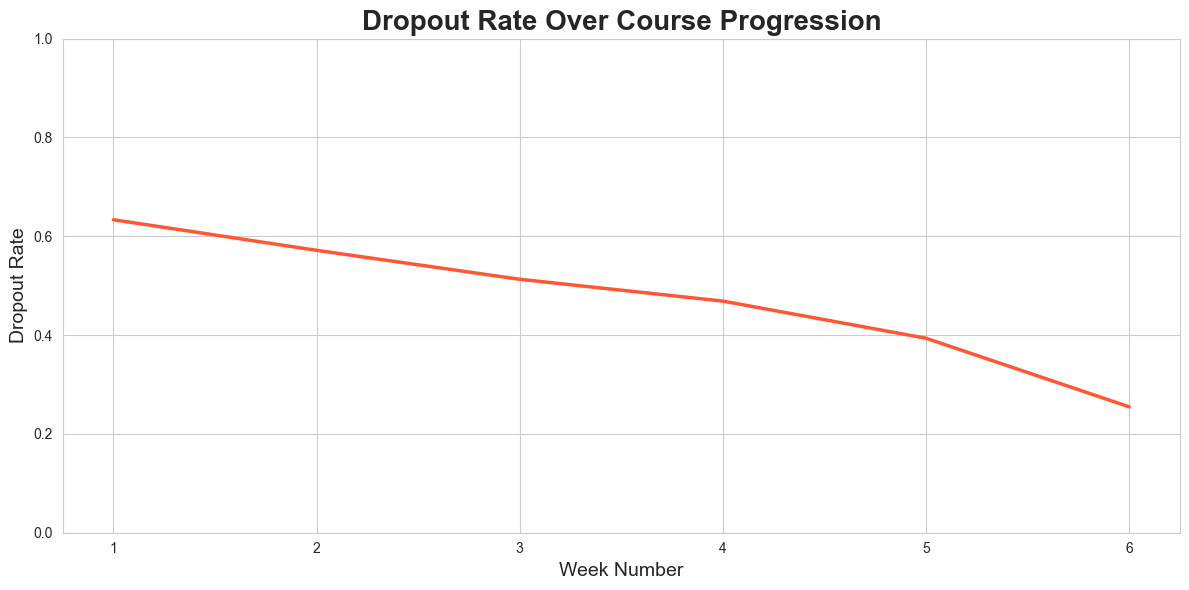

In [5]:

# dropout rate per week for each course
weekly_dropout = df.groupby(['course_id', 'week_number', 'truth']).size().unstack(fill_value=0)
weekly_dropout['dropout_rate'] = weekly_dropout[1] / (weekly_dropout[0] + weekly_dropout[1])
# average dropout rate across all courses
avg_dropout_rate = weekly_dropout.groupby('week_number')['dropout_rate'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.lineplot(data=avg_dropout_rate, x='week_number', y='dropout_rate', linewidth=2.5, color='#FF5733')
plt.title('Dropout Rate Over Course Progression', fontsize=20, fontweight='bold')
plt.xlabel('Week Number', fontsize=14)
plt.ylabel('Dropout Rate', fontsize=14)
plt.ylim(0, 1)


plt.tight_layout()
plt.show()

In [10]:
# General Dataset Statistics
total_records = len(df)
total_users = df['username'].nunique()
total_courses = df['course_id'].nunique()
total_enrollments = df['enroll_id'].nunique()
total_sessions = df['session_id'].nunique()

# Action Statistics
total_actions = len(df)
unique_actions = df['action'].nunique()
action_counts = df['action'].value_counts()

# User Demographics
gender_distribution = df['gender'].value_counts(normalize=True)
education_distribution = df['education'].value_counts(normalize=True)
age_stats = df['birth'].agg(['min', 'max', 'mean', 'median'])

# Course Statistics
course_types = df['course_type'].value_counts()
course_categories = df['category'].value_counts()
avg_course_duration = (df['end'] - df['start']).mean().days

# Dropout Statistics
dropout_rate = df['truth'].mean()
dropout_by_gender = df.groupby('gender')['truth'].mean()
dropout_by_education = df.groupby('education')['truth'].mean()

# Activity Statistics
actions_per_user = df.groupby('username').size().agg(['min', 'max', 'mean', 'median'])
actions_per_course = df.groupby('course_id').size().agg(['min', 'max', 'mean', 'median'])

# Time-based Statistics
df['time'] = pd.to_datetime(df['time'])
activity_by_day = df['time'].dt.day_name().value_counts()
activity_by_hour = df['time'].dt.hour.value_counts().sort_index()

# Print the summary
print("Dataset Summary")
print("===============")
print(f"Total Records: {total_records}")
print(f"Total Users: {total_users}")
print(f"Total Courses: {total_courses}")
print(f"Total Enrollments: {total_enrollments}")
print(f"Total Sessions: {total_sessions}")
print(f"\nTotal Actions: {total_actions}")
print(f"Unique Action Types: {unique_actions}")
print("\nTop 5 Actions:")
print(action_counts.head())

print("\nUser Demographics")
print("=================")
print("Gender Distribution:")
print(gender_distribution)
print("\nEducation Distribution:")
print(education_distribution)
print("\nAge Statistics:")
print(age_stats)

print("\nCourse Statistics")
print("=================")
print("Course Types:")
print(course_types)
print("\nCourse Categories:")
print(course_categories)
print(f"\nAverage Course Duration: {avg_course_duration:.2f} days")

print("\nDropout Statistics")
print("==================")
print(f"Overall Dropout Rate: {dropout_rate:.2%}")
print("\nDropout Rate by Gender:")
print(dropout_by_gender)
print("\nDropout Rate by Education:")
print(dropout_by_education)

print("\nActivity Statistics")
print("===================")
print("Actions per User:")
print(actions_per_user)
print("\nActions per Course:")
print(actions_per_course)

print("\nTime-based Statistics")
print("=====================")
print("Activity by Day of Week:")
print(activity_by_day)
print("\nActivity by Hour of Day:")
print(activity_by_hour)

Dataset Summary
Total Records: 29165540
Total Users: 69823
Total Courses: 247
Total Enrollments: 157943
Total Sessions: 292480

Total Actions: 29165540
Unique Action Types: 22

Top 5 Actions:
action
stop_video          5561410
pause_video         4204205
click_courseware    3978918
play_video          3415575
problem_get         2353346
Name: count, dtype: int64

User Demographics
Gender Distribution:
gender
male      0.657312
female    0.342688
Name: proportion, dtype: float64

Education Distribution:
education
Bachelor's    0.485789
High          0.252744
Master's      0.149943
Associate     0.080835
Doctorate     0.018216
Middle        0.008925
Primary       0.003549
Name: proportion, dtype: float64

Age Statistics:
min       1894.000000
max       2018.000000
mean      1989.221929
median    1993.000000
Name: birth, dtype: float64

Course Statistics
Course Types:
course_type
0    29165540
Name: count, dtype: int64

Course Categories:
category
philosophy          6856322
computer     

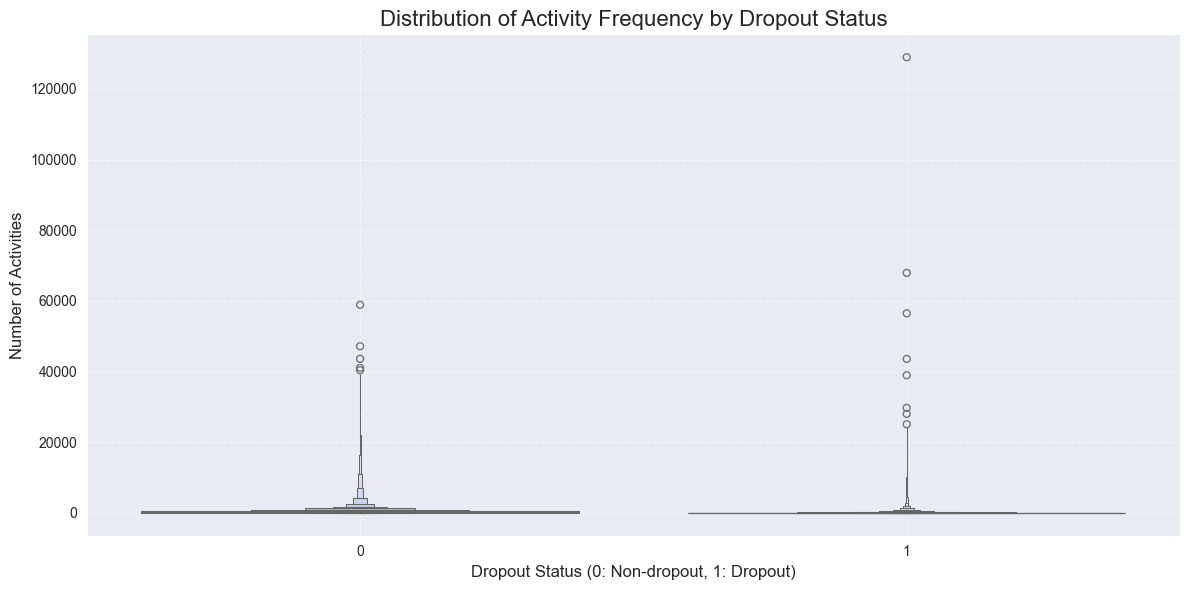

T-statistic: -82.10325822142569
P-value: 0.0


In [11]:
activity_frequency = df.groupby('enroll_id').size().reset_index(name='activity_count')
activity_frequency = pd.merge(activity_frequency, df[['enroll_id', 'truth']].drop_duplicates(), on='enroll_id')

plt.figure(figsize=(12, 6))
sns.boxenplot(x='truth', y='activity_count', data=activity_frequency)
plt.title('Distribution of Activity Frequency by Dropout Status', fontsize=16)
plt.xlabel('Dropout Status (0: Non-dropout, 1: Dropout)', fontsize=12)
plt.ylabel('Number of Activities', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

sns.set_style("whitegrid")
sns.set_palette("deep")

plt.tight_layout()
plt.show()

#statistical test
from scipy import stats
dropout = activity_frequency[activity_frequency['truth'] == 1]['activity_count']
non_dropout = activity_frequency[activity_frequency['truth'] == 0]['activity_count']
t_stat, p_value = stats.ttest_ind(dropout, non_dropout)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

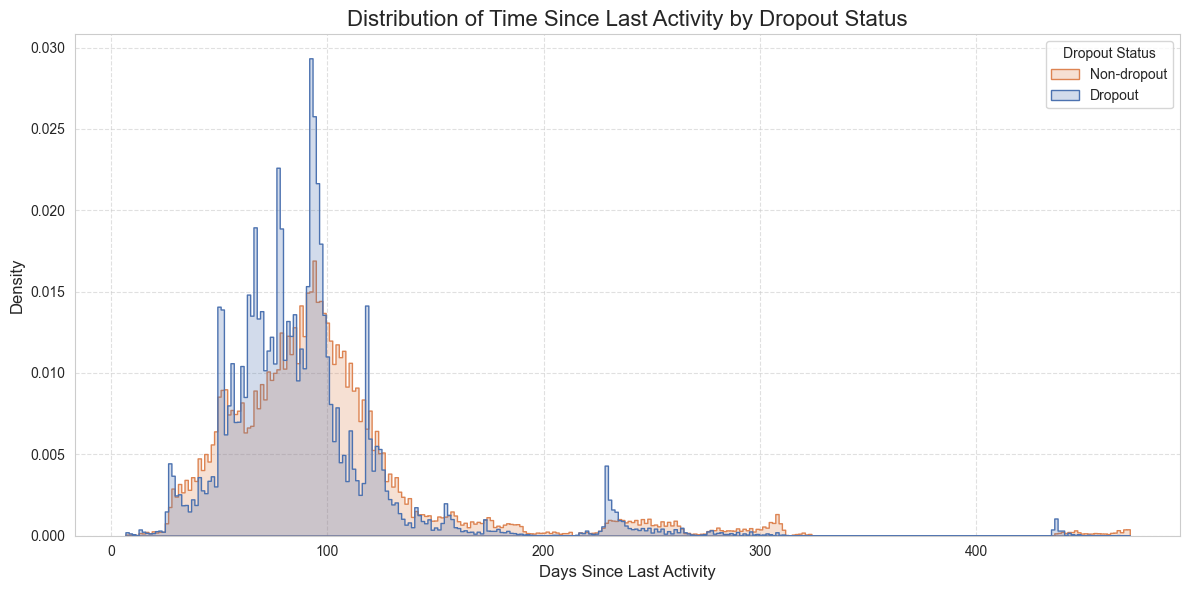

Correlation between days since last activity and dropout: 0.07826095550645111


In [12]:
#time since last activity
df['time'] = pd.to_datetime(df['time'])
last_activity = df.groupby('enroll_id')['time'].max().reset_index()
course_end = df.groupby('enroll_id')['end'].first().reset_index()
time_since_last = pd.merge(last_activity, course_end, on='enroll_id')
time_since_last['days_since_last'] = (time_since_last['end'] - time_since_last['time']).dt.total_seconds() / (24 * 3600)
time_since_last = pd.merge(time_since_last, df[['enroll_id', 'truth']].drop_duplicates(), on='enroll_id')

plt.figure(figsize=(12, 6))
sns.histplot(data=time_since_last, x='days_since_last', hue='truth', element='step', stat='density', common_norm=False)
plt.title('Distribution of Time Since Last Activity by Dropout Status', fontsize=16)
plt.xlabel('Days Since Last Activity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.legend(title='Dropout Status', labels=['Non-dropout', 'Dropout'])
plt.tight_layout()
plt.show()

correlation = time_since_last['days_since_last'].corr(time_since_last['truth'])
print(f"Correlation between days since last activity and dropout: {correlation}")

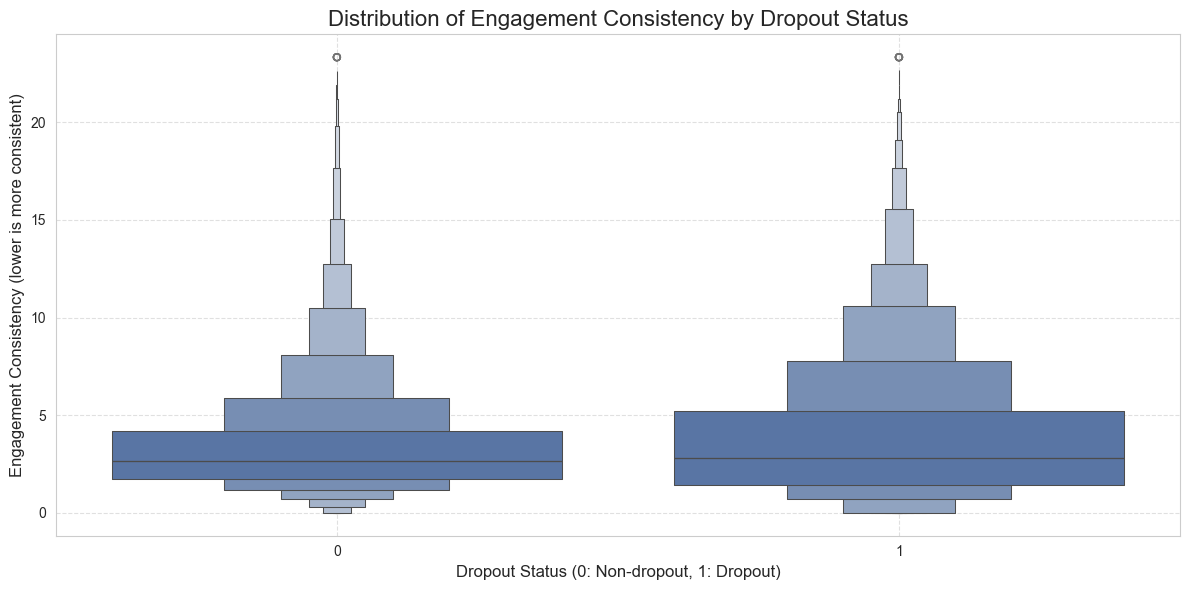

T-statistic: nan
P-value: nan


In [13]:
df['time'] = pd.to_datetime(df['time'])
df['days'] = df['time'].dt.date
engagement = df.groupby(['enroll_id', 'days']).size().reset_index(name='daily_activities')
engagement['days'] = pd.to_datetime(engagement['days'])
engagement['days_diff'] = engagement.groupby('enroll_id')['days'].diff().dt.days
engagement_consistency = engagement.groupby('enroll_id')['days_diff'].std().reset_index(name='consistency')
engagement_consistency = pd.merge(engagement_consistency, df[['enroll_id', 'truth']].drop_duplicates(), on='enroll_id')

plt.figure(figsize=(12, 6))
sns.boxenplot(x='truth', y='consistency', data=engagement_consistency)
plt.title('Distribution of Engagement Consistency by Dropout Status', fontsize=16)
plt.xlabel('Dropout Status (0: Non-dropout, 1: Dropout)', fontsize=12)
plt.ylabel('Engagement Consistency (lower is more consistent)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
sns.set_style("whitegrid")
sns.set_palette("deep")
plt.tight_layout()
plt.show()

from scipy import stats
dropout = engagement_consistency[engagement_consistency['truth'] == 1]['consistency']
non_dropout = engagement_consistency[engagement_consistency['truth'] == 0]['consistency']
t_stat, p_value = stats.ttest_ind(dropout, non_dropout)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Top 10 correlated features:
time_spent_hours: -0.5368683546449513
num_sessions: -0.4521045562948442
unique_objects: -0.42487359809057085
freq_problem_check: -0.20804193325471176
total_actions: -0.20231933942039068
freq_click_about: 0.19219149250911494
freq_click_courseware: -0.15866664698075494
freq_load_video: 0.133810742311054
freq_stop_video: -0.1223700027552063
freq_click_info: 0.117546869296084


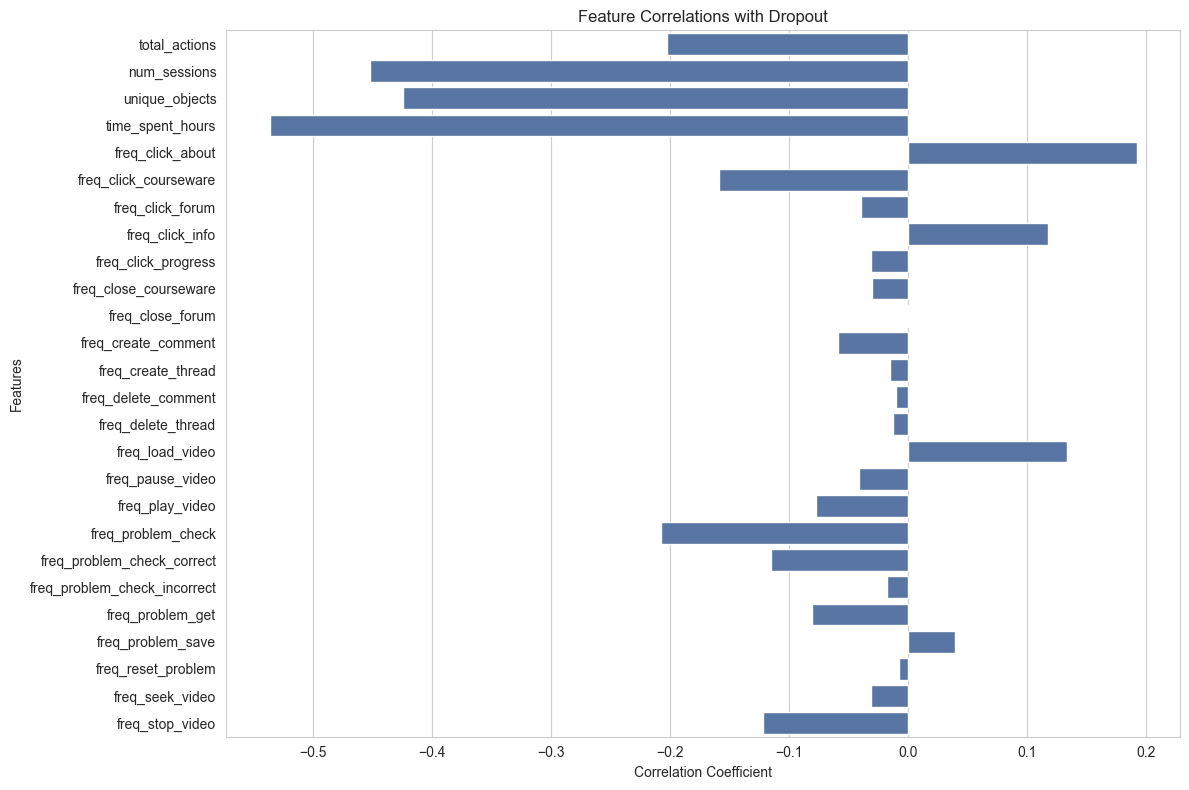

In [24]:
from scipy.stats import pointbiserialr

train_data = pd.merge(train_log, train_truth, on='enroll_id')

def create_features(df):
    features = df.groupby('enroll_id').agg({
        'action': 'count',
        'session_id': 'nunique',
        'object': 'nunique',
        'time': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).total_seconds() / 3600  # time spent in hours
    }).rename(columns={
        'action': 'total_actions',
        'session_id': 'num_sessions',
        'object': 'unique_objects',
        'time': 'time_spent_hours'
    })
    
    action_types = df.groupby('enroll_id')['action'].value_counts(normalize=True).unstack(fill_value=0)
    action_types.columns = [f'freq_{col}' for col in action_types.columns]
    features = pd.concat([features, action_types], axis=1)
    
    return features

features = create_features(train_data)

features = pd.merge(features, train_truth, on='enroll_id')

def calculate_correlations(df, target):
    correlations = {}
    for column in df.columns:
        if column != target and column != 'enroll_id':
            corr, _ = pointbiserialr(df[target], df[column])
            correlations[column] = corr
    return correlations

correlations = calculate_correlations(features, 'truth')

sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("Top 10 correlated features:")
for feature, corr in sorted_correlations[:10]:
    print(f"{feature}: {corr}")

plt.figure(figsize=(12, 8))
sns.barplot(x=list(correlations.values()), y=list(correlations.keys()))
plt.title('Feature Correlations with Dropout')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

T-test for time_spent_hours:
T-statistic: -252.8975864500572, p-value: 0.0



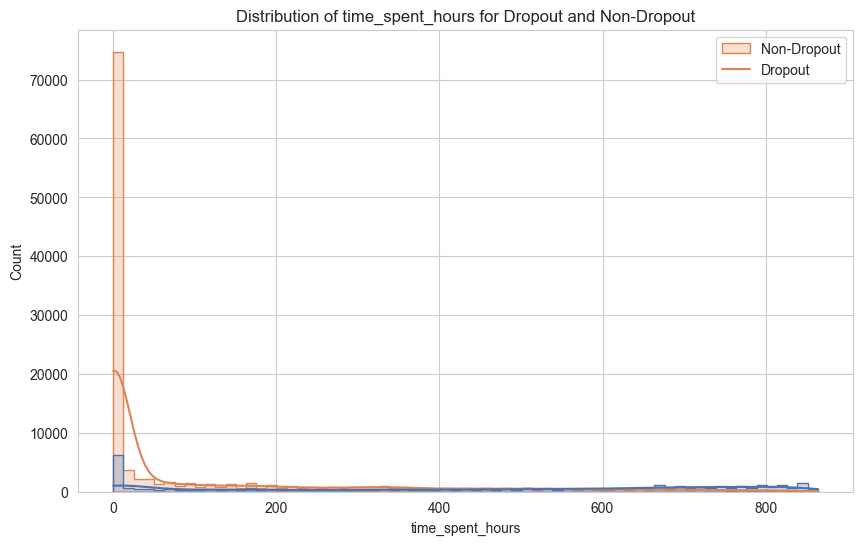

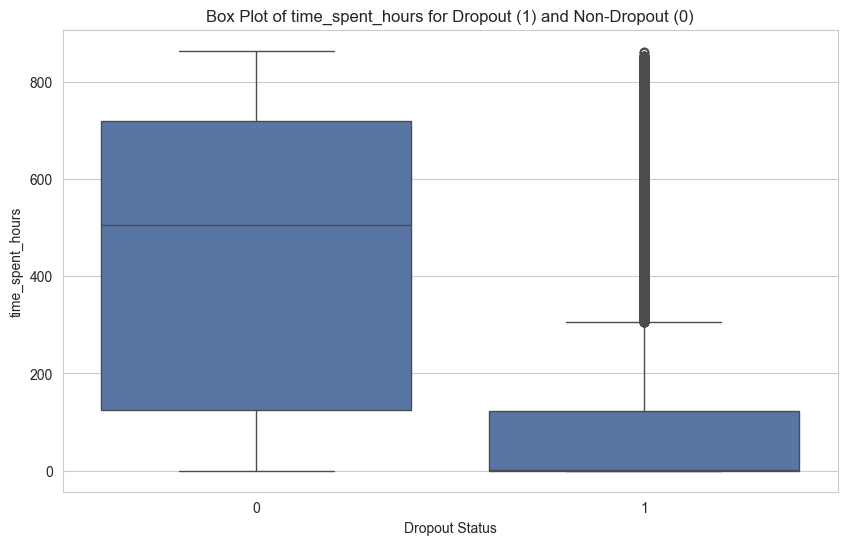

T-test for num_sessions:
T-statistic: -201.43667170989528, p-value: 0.0



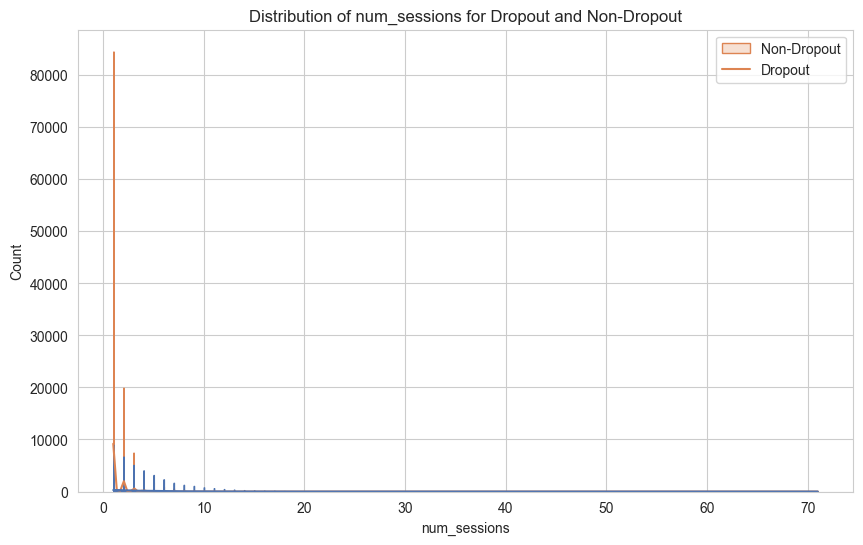

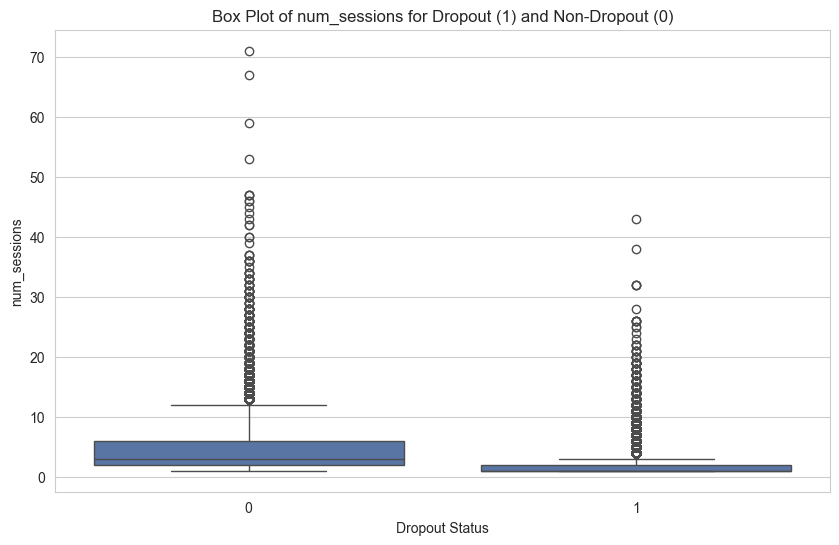

T-test for unique_objects:
T-statistic: -186.52513550800188, p-value: 0.0



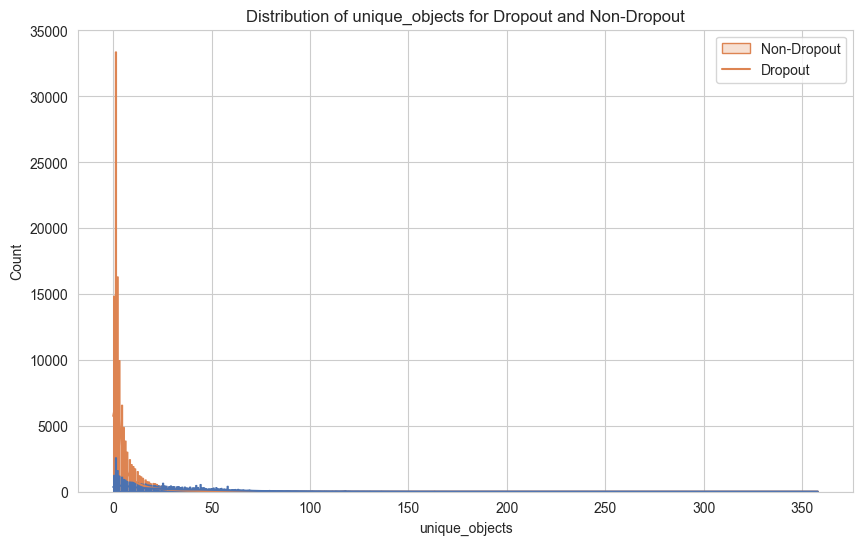

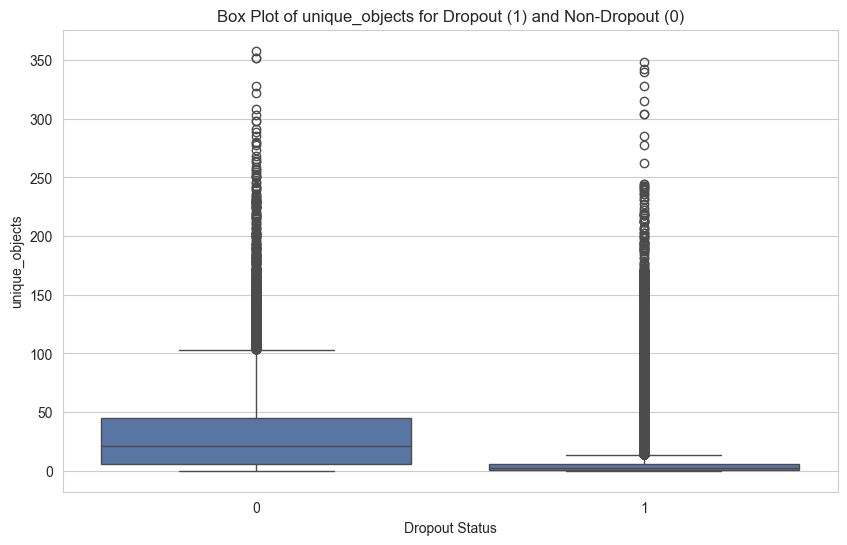

T-test for total_actions:
T-statistic: -82.10325822142569, p-value: 0.0



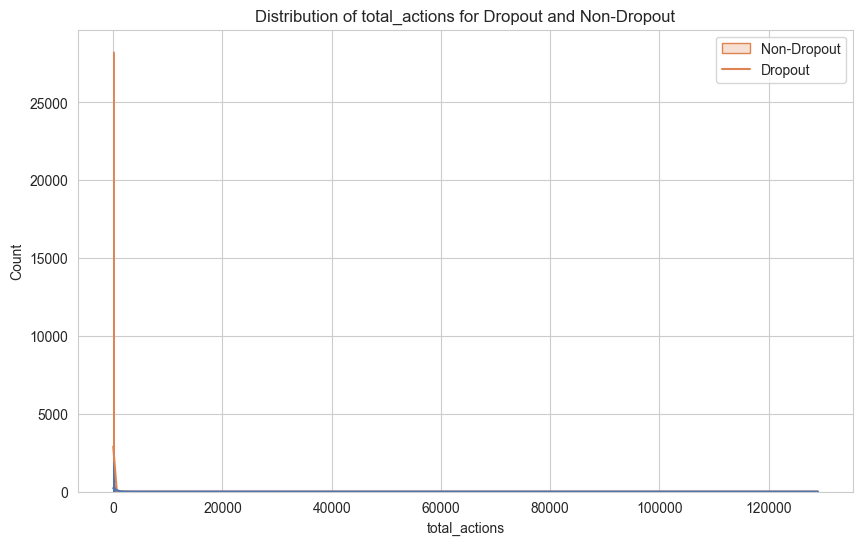

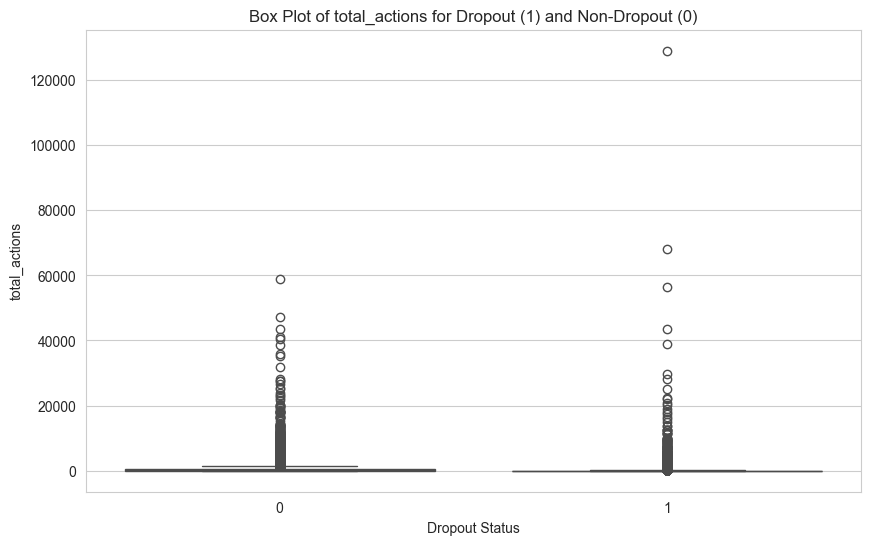

T-test for freq_click_about:
T-statistic: 77.83131723265933, p-value: 0.0



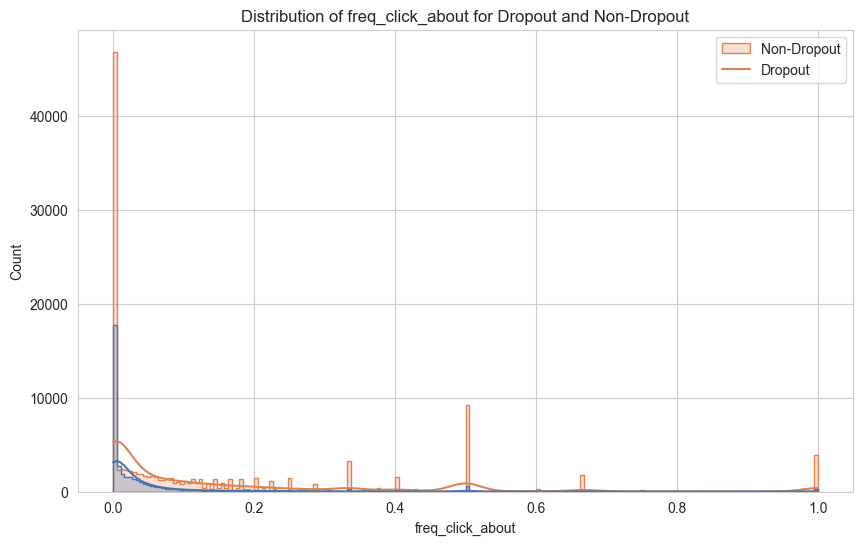

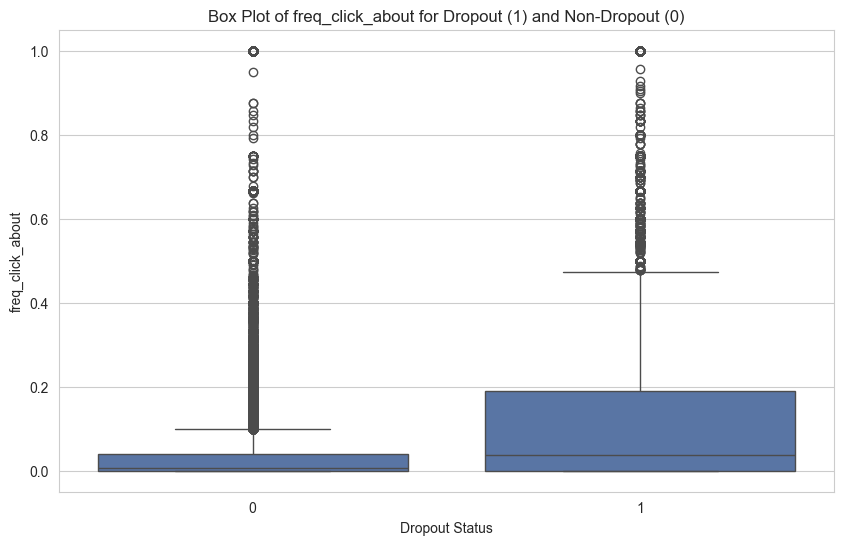

T-test for freq_click_courseware:
T-statistic: -63.866009312109036, p-value: 0.0



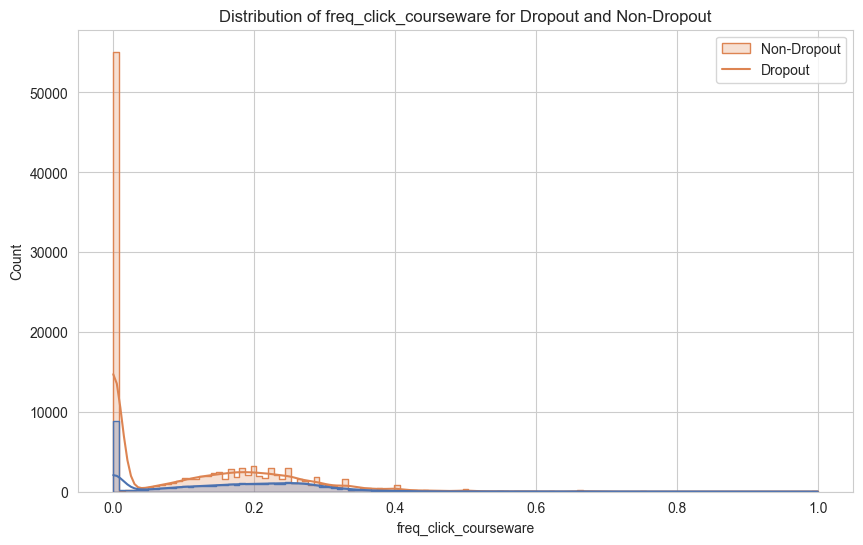

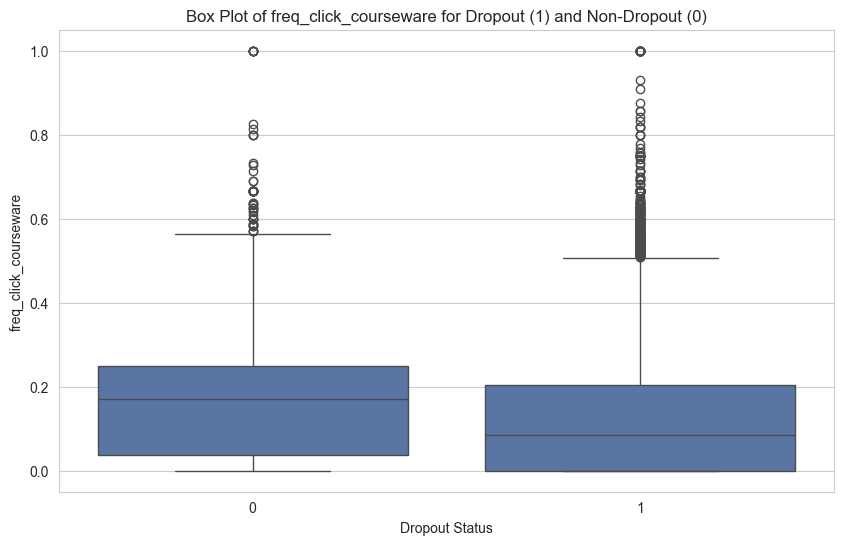

T-test for freq_load_video:
T-statistic: 53.66136815033299, p-value: 0.0



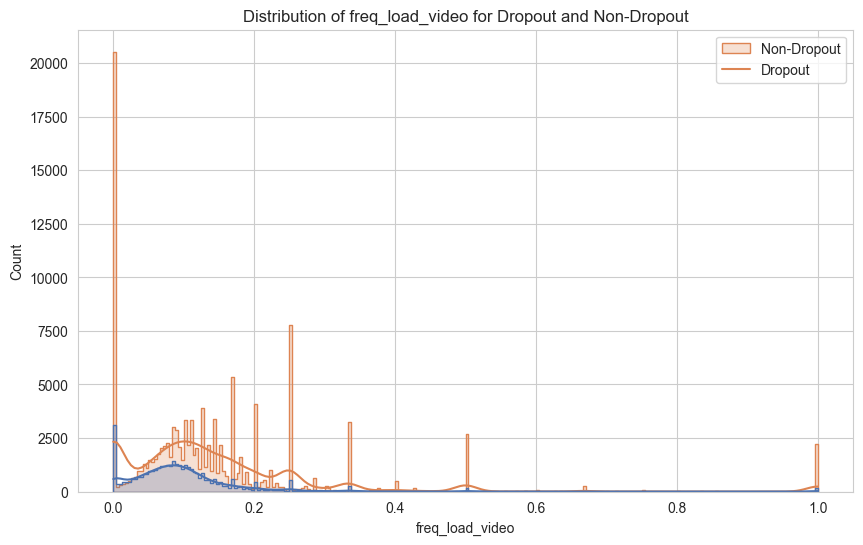

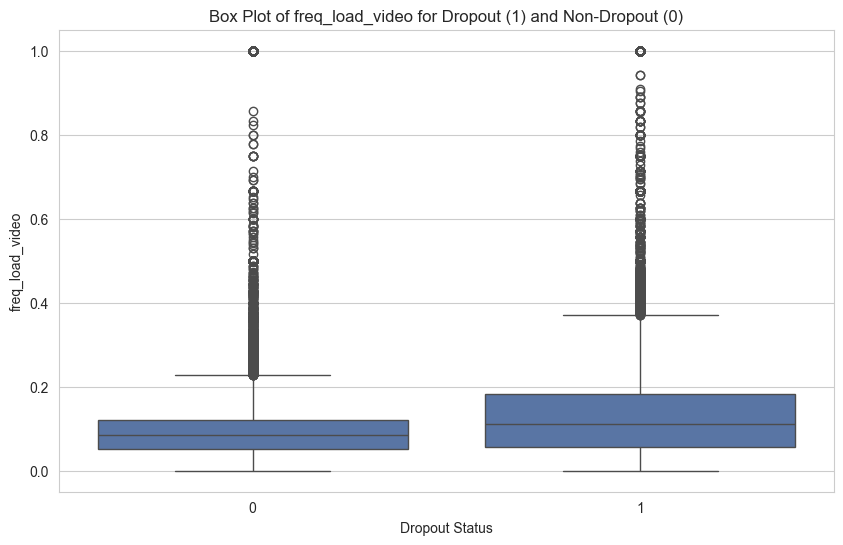

T-test for freq_problem_check:
T-statistic: -84.52909598057195, p-value: 0.0



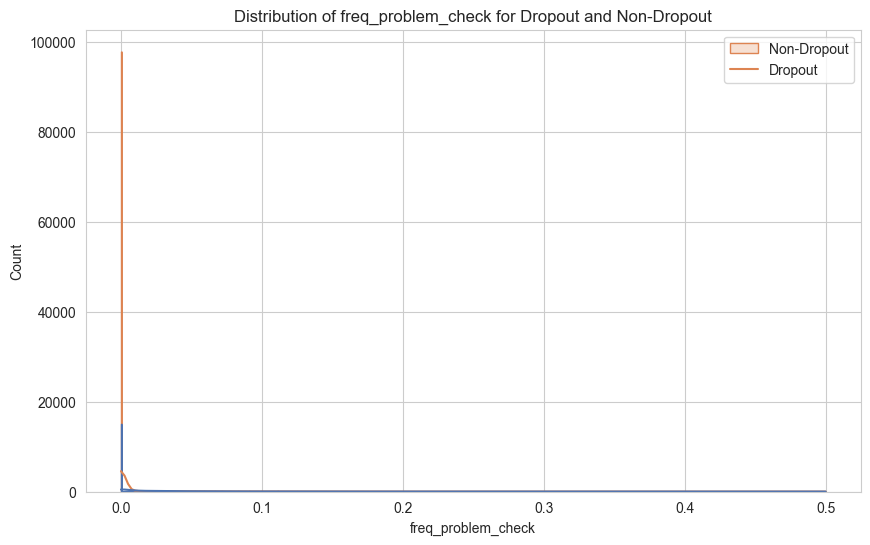

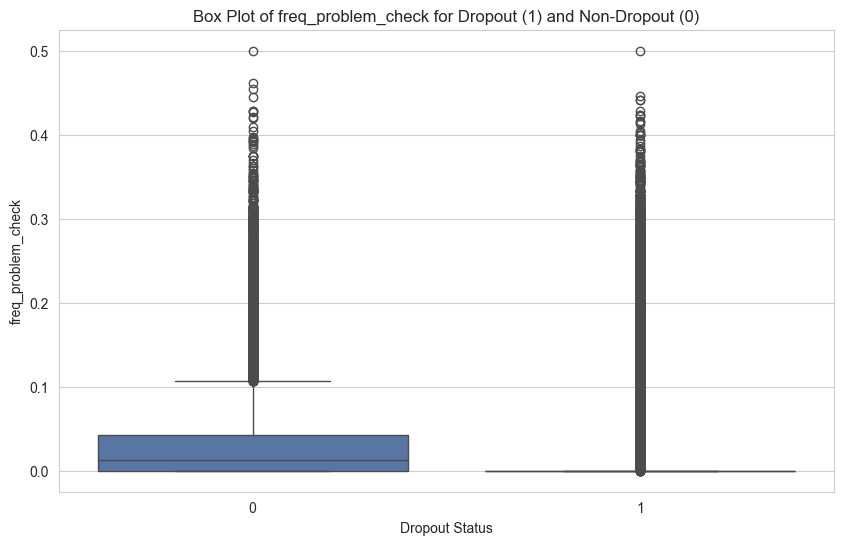

In [30]:
top_features = ['time_spent_hours', 'num_sessions', 'unique_objects', 'total_actions',
                'freq_click_about', 'freq_click_courseware', 'freq_load_video', 'freq_problem_check']

for feature in top_features:
    dropout = features[features['truth'] == 1][feature]
    non_dropout = features[features['truth'] == 0][feature]
    t_stat, p_value = stats.ttest_ind(dropout, non_dropout)
    print(f"T-test for {feature}:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}")
    print()

    plt.figure(figsize=(10, 6))
    sns.histplot(data=features, x=feature, hue='truth', kde=True, element="step")
    plt.title(f"Distribution of {feature} for Dropout and Non-Dropout")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(labels=['Non-Dropout', 'Dropout'])
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=features, x='truth', y=feature)
    plt.title(f"Box Plot of {feature} for Dropout (1) and Non-Dropout (0)")
    plt.xlabel("Dropout Status")
    plt.ylabel(feature)
    plt.show()

In [ ]:
train_data = pd.merge(train_log, train_truth, on='enroll_id')
train_data = pd.merge(train_data, user_info, left_on='username', right_on='user_id')
train_data = pd.merge(train_data, course_info, on='course_id')

features = train_data.groupby('enroll_id').agg({
    'time': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).total_seconds() / 3600,  
    'session_id': 'nunique', 
    'object': 'nunique',  
    'action': 'count',  
    'truth': 'first',  
    'gender': 'first',
    'education': 'first',
    'birth': 'first',
    'course_type': 'first',
    'category': 'first',
    'start': 'first',
    'end': 'first'
}).rename(columns={
    'time': 'time_spent_hours',
    'session_id': 'num_sessions',
    'object': 'unique_objects',
    'action': 'total_actions'
})

features['course_duration'] = (pd.to_datetime(features['end']) - pd.to_datetime(features['start'])).dt.days
features['age'] = 2024 - features['birth']  # Assuming the current year is 2024

action_types = train_data.groupby('enroll_id')['action'].value_counts(normalize=True).unstack(fill_value=0)
action_types.columns = [f'freq_{col}' for col in action_types.columns]
features = pd.concat([features, action_types], axis=1)

def analyze_feature(feature_name):
    dropout = features[features['truth'] == 1][feature_name]
    non_dropout = features[features['truth'] == 0][feature_name]
    
    t_stat, p_value = stats.ttest_ind(dropout, non_dropout)
    print(f"T-test for {feature_name}:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}")
    
    plt.figure(figsize=(12, 5))
    
    # plt.subplot(1, 2, 1)
    # sns.histplot(data=features, x=feature_name, hue='truth', kde=True, element="step")
    # plt.title(f"Distribution of {feature_name}")
    # plt.legend(labels=['Non-Dropout', 'Dropout'])
    
    # plt.subplot(1, 2, 2)
    sns.boxplot(data=features, x='truth', y=feature_name)
    plt.title(f"Box Plot of {feature_name}")
    plt.xlabel("Dropout Status (0: Non-Dropout, 1: Dropout)")
    
    plt.tight_layout()
    plt.show()

top_features = ['time_spent_hours', 'num_sessions', 'unique_objects', 'total_actions',
                'freq_problem_check', 'freq_play_video', 'freq_pause_video', 'course_duration']

for feature in top_features:
    analyze_feature(feature)

# Correlation analysis
numeric_features = features.select_dtypes(include=[np.number]).columns
correlation_matrix = features[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

dropout_correlations = correlation_matrix['truth'].sort_values(key=abs, ascending=False)
print("\nTop correlations with dropout:")
print(dropout_correlations.head(10))

T-test for time_spent_hours:
T-statistic: -252.8975864500572, p-value: 0.0


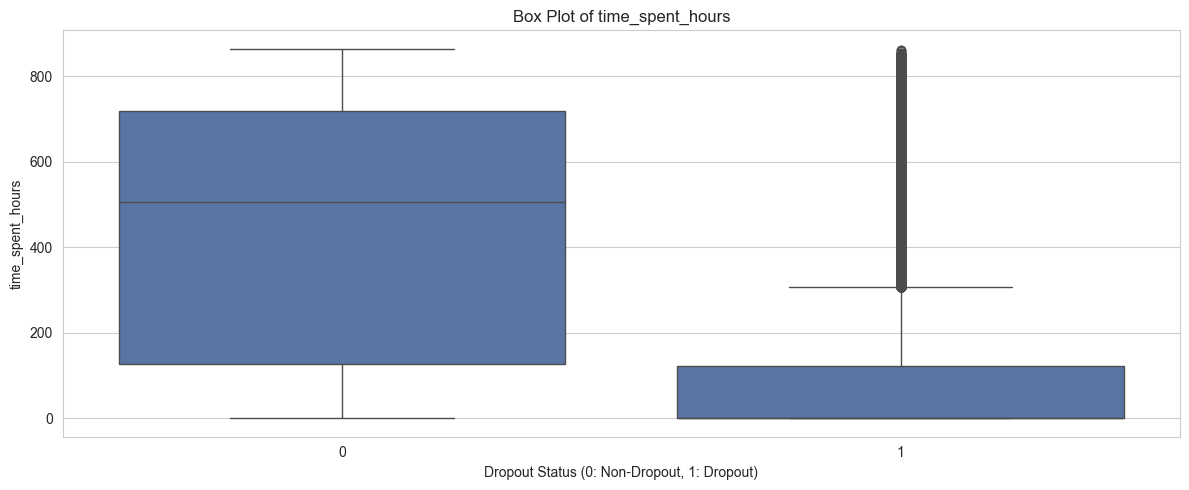

T-test for num_sessions:
T-statistic: -201.43667170989528, p-value: 0.0


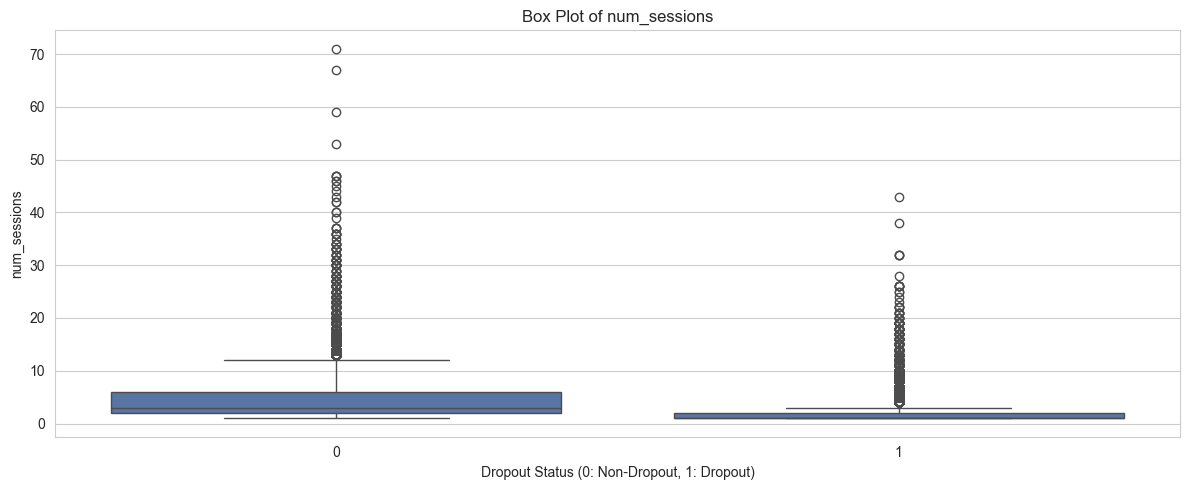

T-test for unique_objects:
T-statistic: -186.52513550800188, p-value: 0.0


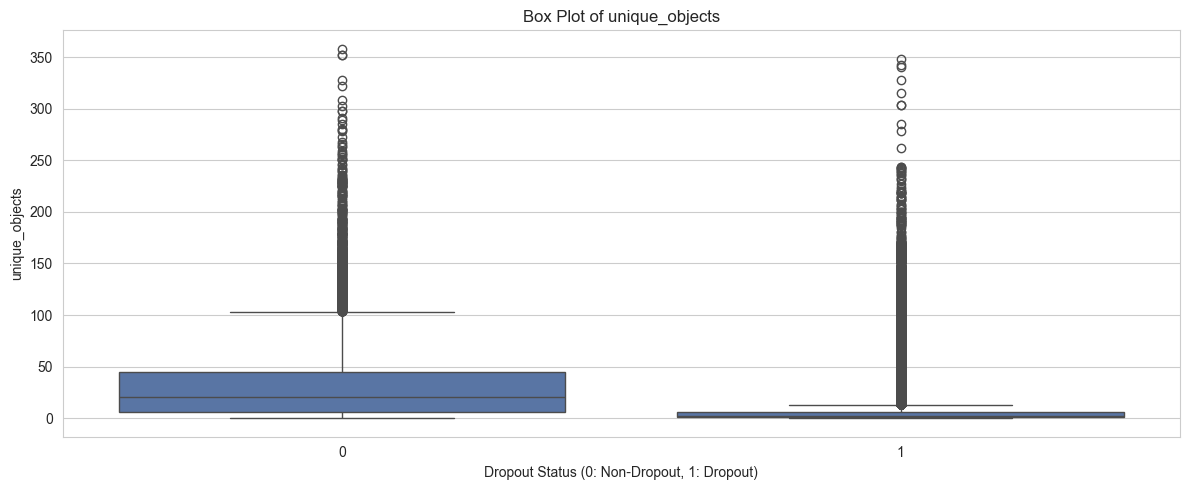

T-test for total_actions:
T-statistic: -82.10325822142569, p-value: 0.0


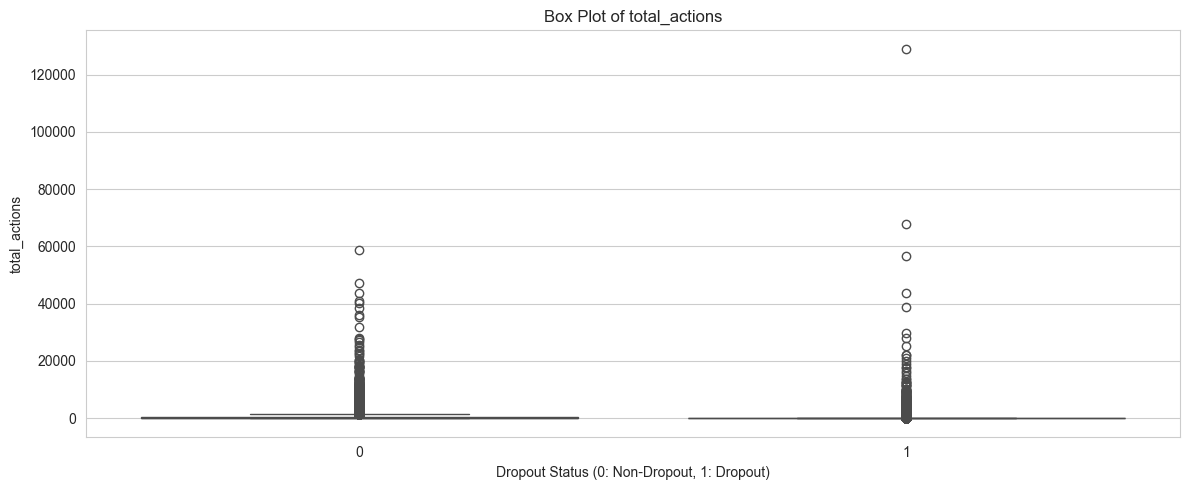

T-test for freq_problem_check:
T-statistic: -84.52909598057195, p-value: 0.0


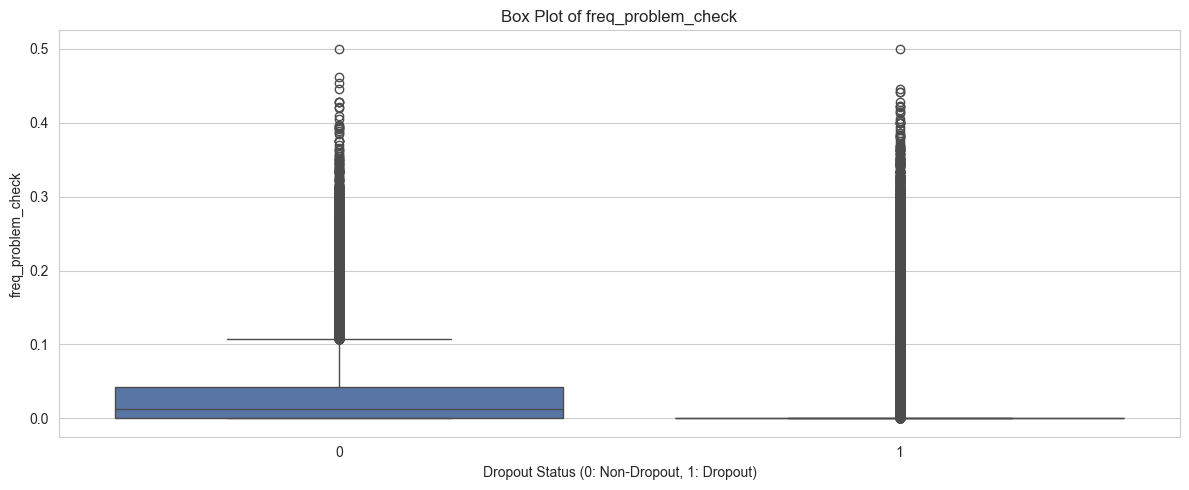

T-test for freq_play_video:
T-statistic: -30.86500448894876, p-value: 1.4781006321540574e-208


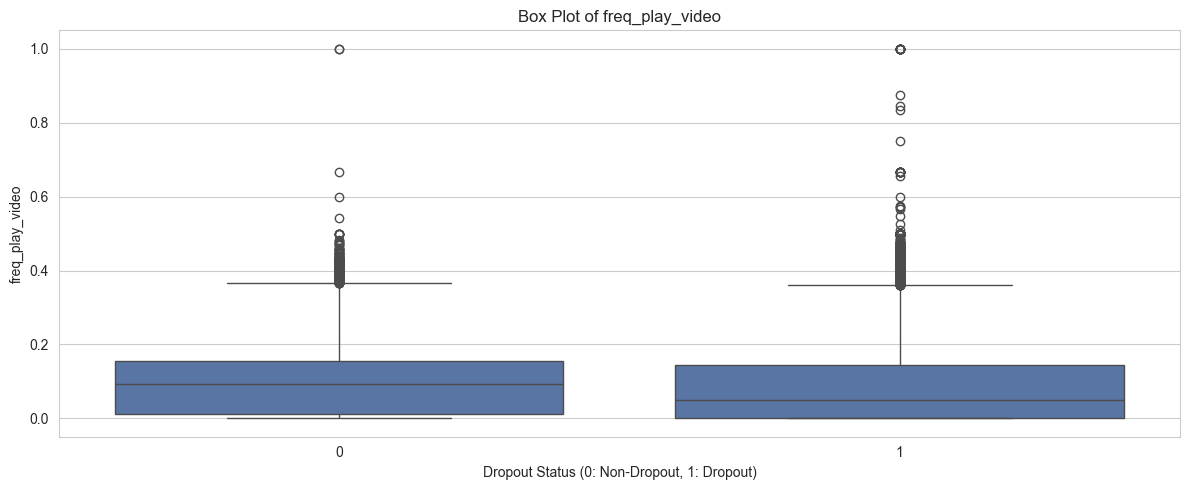

T-test for freq_pause_video:
T-statistic: -16.365813724050675, p-value: 3.761284271340235e-60


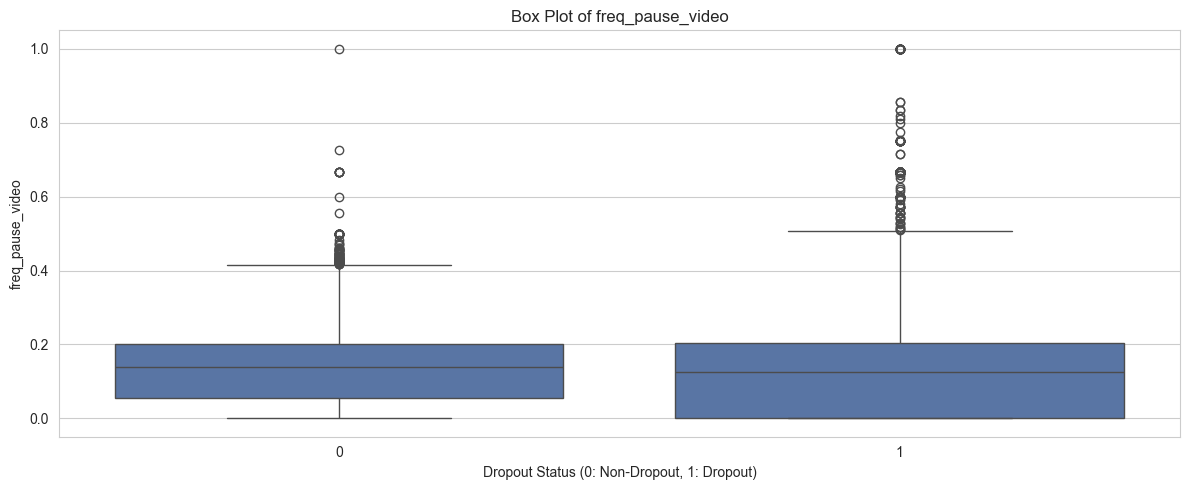

T-test for course_duration:
T-statistic: -4.187553073316924, p-value: 2.8213072179003384e-05


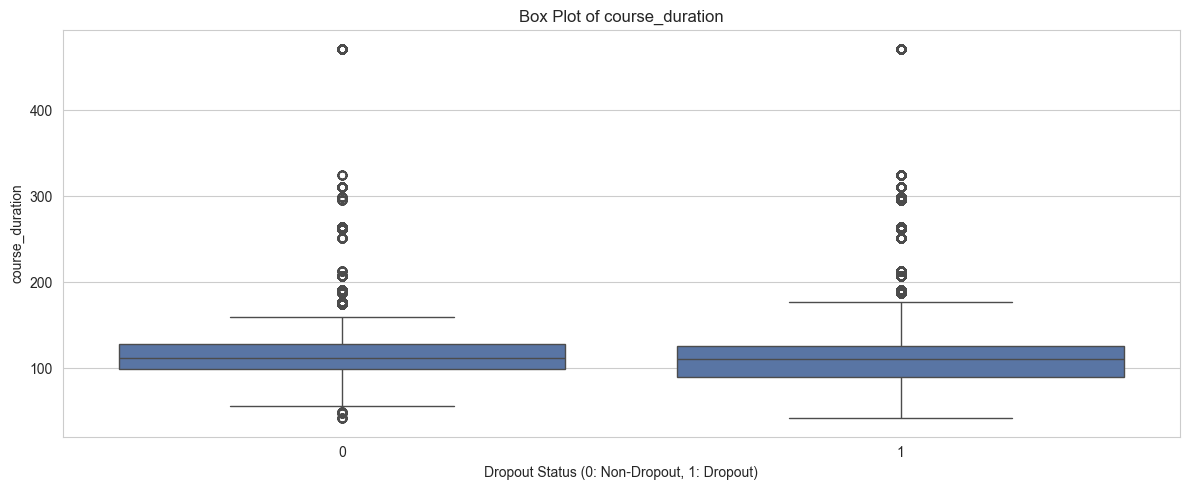

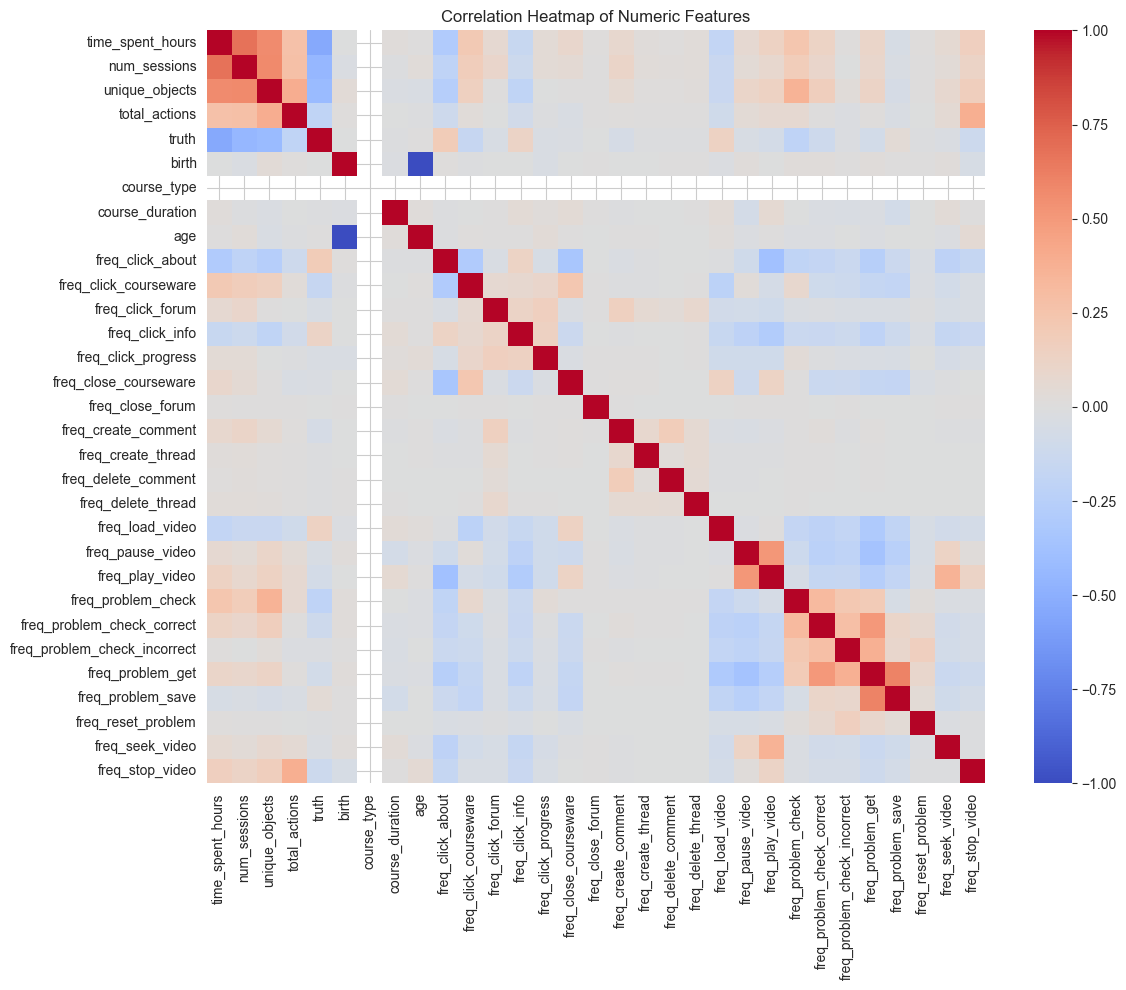

In [33]:
def analyze_feature(feature_name):
    dropout = features[features['truth'] == 1][feature_name]
    non_dropout = features[features['truth'] == 0][feature_name]
    
    t_stat, p_value = stats.ttest_ind(dropout, non_dropout)
    print(f"T-test for {feature_name}:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}")
    
    plt.figure(figsize=(12, 5))
    
    # plt.subplot(1, 2, 1)
    # sns.histplot(data=features, x=feature_name, hue='truth', kde=True, element="step")
    # plt.title(f"Distribution of {feature_name}")
    # plt.legend(labels=['Non-Dropout', 'Dropout'])
    
    # plt.subplot(1, 2, 2)
    sns.boxplot(data=features, x='truth', y=feature_name)
    plt.title(f"Box Plot of {feature_name}")
    plt.xlabel("Dropout Status (0: Non-Dropout, 1: Dropout)")
    
    plt.tight_layout()
    plt.show()

top_features = ['time_spent_hours', 'num_sessions', 'unique_objects', 'total_actions',
                'freq_problem_check', 'freq_play_video', 'freq_pause_video', 'course_duration']

for feature in top_features:
    analyze_feature(feature)

# Correlation analysis
numeric_features = features.select_dtypes(include=[np.number]).columns
correlation_matrix = features[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [56]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder


user_profile = pd.read_csv('user_info.csv')
course_info = pd.read_csv('course_info.csv')
le = LabelEncoder()

user_features = user_profile.copy()
user_features['gender'] = le.fit_transform(user_features['gender'])
user_features['education'] = le.fit_transform(user_features['education'])
user_features['age'] = 2024 - user_features['birth']  # Assuming current year is 2024
user_features = user_features.drop('birth', axis=1)
course_features = course_info.copy()
course_features['duration'] = (pd.to_datetime(course_features['end']) - pd.to_datetime(course_features['start'])).dt.days
course_features['course_type'] = le.fit_transform(course_features['course_type'])
course_features['category'] = le.fit_transform(course_features['category'])
course_id_mapping = dict(zip(course_info['course_id'], course_info['id']))

enrollments = train_log.groupby('enroll_id').agg({
    'username': 'first',
    'course_id': 'first',
    'session_id': 'nunique',
    'action': 'count',
    'object': 'nunique',
    'time': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).total_seconds() / 3600
}).rename(columns={
    'session_id': 'num_sessions',
    'action': 'total_actions',
    'object': 'unique_objects',
    'time': 'time_spent_hours'
})

action_counts = train_log.groupby('enroll_id')['action'].value_counts(normalize=True).unstack(fill_value=0)
action_counts.columns = [f'freq_{col}' for col in action_counts.columns]
enrollments = pd.concat([enrollments, action_counts], axis=1)
enrollments['course_id_num'] = enrollments['course_id'].map(course_id_mapping)
unmapped_courses = enrollments[enrollments['course_id_num'].isna()]['course_id'].unique()
if len(unmapped_courses) > 0:
    print(f"Warning: {len(unmapped_courses)} courses in log data not found in course_info.")
    max_course_id = max(course_info['id'].max(), enrollments['course_id_num'].max())
    new_course_ids = {course: i + max_course_id + 1 for i, course in enumerate(unmapped_courses)}
    enrollments['course_id_num'] = enrollments['course_id_num'].fillna(enrollments['course_id'].map(new_course_ids))
    print(f"New IDs have been assigned to unmapped courses.")



enrollments['course_id_num'] = enrollments['course_id_num'].astype(int)
new_courses = enrollments[~enrollments['course_id_num'].isin(course_features.index)]
if len(new_courses) > 0:
    print(f"Adding {len(new_courses)} new courses to course_features")
    new_course_features = pd.DataFrame(index=new_courses['course_id_num'].unique())
    new_course_features['duration'] = new_course_features.index.map(lambda x: enrollments[enrollments['course_id_num'] == x]['time_spent_hours'].mean())
    new_course_features['course_type'] = le.fit_transform([0] * len(new_course_features))
    new_course_features['category'] = le.fit_transform([0] * len(new_course_features))
    course_features = pd.concat([course_features, new_course_features])

node_features = pd.concat([user_features.set_index('user_id'), course_features])
for column in node_features.select_dtypes(exclude=[np.number]).columns:
    node_features[column] = le.fit_transform(node_features[column])

node_features = torch.FloatTensor(node_features.values)

user_to_index = {uid: idx for idx, uid in enumerate(user_profile['user_id'])}
course_to_index = {cid: idx + len(user_to_index) for idx, cid in enumerate(course_features.index)}

# Create edge_index
edge_index = torch.LongTensor([
    [user_to_index[uid] for uid in enrollments['username']],
    [course_to_index[int(cid)] for cid in enrollments['course_id_num']]
])

edge_feature_columns = [
    'num_sessions', 'total_actions', 'unique_objects', 'time_spent_hours',
    'freq_problem_check'
]
edge_features = torch.FloatTensor(enrollments[edge_feature_columns].values)

dropout_labels = torch.LongTensor(train_truth.set_index('enroll_id').loc[enrollments.index, 'truth'].values)

data = Data(x=node_features, 
            edge_index=edge_index, 
            edge_attr=edge_features, 
            y=dropout_labels)

print("Data preparation completed successfully.")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of node features: {data.num_node_features}")
print(f"Number of edge features: {data.num_edge_features}")
print("Edge features included:")
for i, feature in enumerate(edge_feature_columns):
    print(f"  {i+1}. {feature}")



Adding 40849 new courses to course_features
Data preparation completed successfully.
Number of nodes: 9633636
Number of edges: 157943
Number of node features: 10
Number of edge features: 5
Edge features included:
  1. num_sessions
  2. total_actions
  3. unique_objects
  4. time_spent_hours
  5. freq_problem_check


Number of NaN values in edge features:
[0 0 0 0 0]

Feature statistics:
Feature 0: min = 1.0000, max = 71.0000, mean = 2.2725, std = 2.6249
Feature 1: min = 1.0000, max = 128992.0000, mean = 184.6586, std = 802.1005
Feature 2: min = 0.0000, max = 358.0000, mean = 13.0830, std = 23.9256
Feature 3: min = 0.0000, max = 863.9470, mean = 187.6179, std = 267.4671
Feature 4: min = 0.0000, max = 0.5000, mean = 0.0169, std = 0.0411


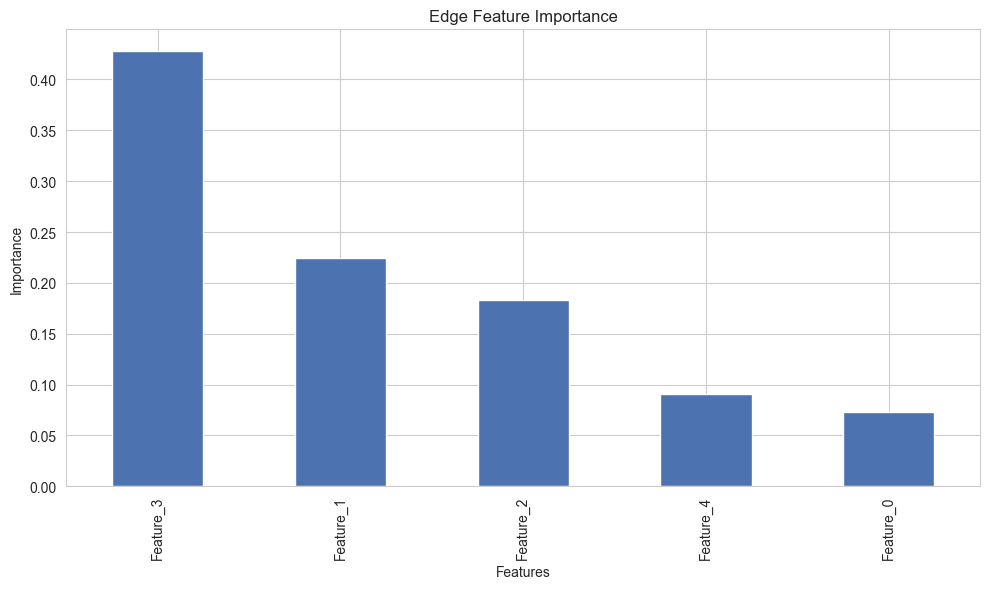


Feature Importances:
Feature_3: 0.4278
Feature_1: 0.2247
Feature_2: 0.1837
Feature_4: 0.0910
Feature_0: 0.0729

Model Accuracy: 0.8242

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.54      0.60      7600
           1       0.86      0.91      0.89     23989

    accuracy                           0.82     31589
   macro avg       0.76      0.73      0.74     31589
weighted avg       0.82      0.82      0.82     31589



In [57]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def analyze_edge_features(edge_features, dropout_labels):
    X = edge_features.numpy()
    y = dropout_labels.numpy()

    print("Number of NaN values in edge features:")
    print(np.isnan(X).sum(axis=0))

    mask = ~np.isnan(X).any(axis=1)
    X_clean = X[mask]
    y_clean = y[mask]

    print("\nFeature statistics:")
    for i in range(X_clean.shape[1]):
        print(f"Feature {i}: min = {X_clean[:, i].min():.4f}, max = {X_clean[:, i].max():.4f}, mean = {X_clean[:, i].mean():.4f}, std = {X_clean[:, i].std():.4f}")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clean)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    importances = rf.feature_importances_
    feature_names = [f"Feature_{i}" for i in range(X_clean.shape[1])]

    feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title('Edge Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

    print("\nFeature Importances:")
    for feature, importance in feature_importance.items():
        print(f"{feature}: {importance:.4f}")

    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

analyze_edge_features(edge_features, dropout_labels)

In [50]:
dp = [[1]*(3)]

In [52]:
[]+[123]


[123]

In [53]:
x = 10
y = 10
id(x), id(y)

(4356973680, 4356973680)

In [55]:
y+=10
x,y
id(x), id(y)

(4356973680, 4356974320)